In [48]:
import itertools

from urllib.parse import urlparse
import numpy as np
import pandas as pd
import feedparser
from newsie.constants import FEED_URL
from newsie.utils import extract_html, get_summary, extract_links
import ssl
import duckdb

import networkx as nx
import matplotlib.pyplot as plt
import itertools

if hasattr(ssl, '_create_unverified_context'):
    ssl._create_default_https_context = ssl._create_unverified_context


In [19]:

feed = feedparser.parse(FEED_URL)
feed


{'bozo': False,
 'entries': [{'title': 'Utah State Aggies jump into the AP Top 25 after big win over Colorado State',
   'title_detail': {'type': 'text/plain',
    'language': None,
    'base': 'https://www.sltrib.com/rss/feed/?sec=/News/Utah/&level=1',
    'value': 'Utah State Aggies jump into the AP Top 25 after big win over Colorado State'},
   'links': [{'rel': 'alternate',
     'type': 'text/html',
     'href': 'https://www.sltrib.com/sports/byu-cougars/2024/01/08/utah-state-aggies-jump-into-ap-top/'}],
   'link': 'https://www.sltrib.com/sports/byu-cougars/2024/01/08/utah-state-aggies-jump-into-ap-top/',
   'id': 'https://www.sltrib.com/sports/byu-cougars/2024/01/08/utah-state-aggies-jump-into-ap-top/',
   'guidislink': False,
   'authors': [{'name': 'Aaron Falk'}],
   'author': 'Aaron Falk',
   'author_detail': {'name': 'Aaron Falk'},
   'published': 'Mon, 08 Jan 2024 18:24:14 +0000',
   'published_parsed': time.struct_time(tm_year=2024, tm_mon=1, tm_mday=8, tm_hour=18, tm_min=24

In [20]:
df = pd.DataFrame(feed.entries)
df

,title,title_detail,links,link,id,guidislink,authors,author,author_detail,published,published_parsed,summary,summary_detail,content
0,Utah State Aggies jump into the AP Top 25 afte...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/sports/byu-cougars/2024...,https://www.sltrib.com/sports/byu-cougars/2024...,False,[{'name': 'Aaron Falk'}],Aaron Falk,{'name': 'Aaron Falk'},"Mon, 08 Jan 2024 18:24:14 +0000","(2024, 1, 8, 18, 24, 14, 0, 8, 0)",AP Top 25 basketball polls: Utah State makes i...,"{'type': 'text/html', 'language': None, 'base'...","[{'type': 'text/html', 'language': None, 'base..."
1,New Heber City Police chief faces two lawsuits...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/news/2024/01/08/new-heb...,https://www.sltrib.com/news/2024/01/08/new-heb...,False,[{'name': 'Kristine Weller | KPCW'}],Kristine Weller | KPCW,{'name': 'Kristine Weller | KPCW'},"Mon, 08 Jan 2024 16:28:06 +0000","(2024, 1, 8, 16, 28, 6, 0, 8, 0)",New Heber City Police Chief Parker Sever is na...,"{'type': 'text/html', 'language': None, 'base'...","[{'type': 'text/html', 'language': None, 'base..."
2,Opinion: How you can help conserve water — and...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/opinion/commentary/2024...,https://www.sltrib.com/opinion/commentary/2024...,False,[{'name': 'Stan Holmes | For The Salt Lake Tri...,Stan Holmes | For The Salt Lake Tribune,{'name': 'Stan Holmes | For The Salt Lake Trib...,"Mon, 08 Jan 2024 15:52:38 +0000","(2024, 1, 8, 15, 52, 38, 0, 8, 0)","“Take action, recognizing that politicians int...","{'type': 'text/html', 'language': None, 'base'...","[{'type': 'text/html', 'language': None, 'base..."
3,Oscar winner says ‘The Real Housewives of Salt...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/artsliving/2024/01/08/o...,https://www.sltrib.com/artsliving/2024/01/08/o...,False,[{'name': 'Scott D. Pierce'}],Scott D. Pierce,{'name': 'Scott D. Pierce'},"Mon, 08 Jan 2024 15:34:37 +0000","(2024, 1, 8, 15, 34, 37, 0, 8, 0)",Academy Award-winner Jennifer Lawrence offered...,"{'type': 'text/html', 'language': None, 'base'...","[{'type': 'text/html', 'language': None, 'base..."
4,Opinion: How Utah is bridging the gap between ...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/opinion/commentary/2024...,https://www.sltrib.com/opinion/commentary/2024...,False,[{'name': 'Nature and Human Health-Utah | For ...,Nature and Human Health-Utah | For The Salt La...,{'name': 'Nature and Human Health-Utah | For T...,"Mon, 08 Jan 2024 16:07:44 +0000","(2024, 1, 8, 16, 7, 44, 0, 8, 0)",“We founded NHH-UT because we recognized the i...,"{'type': 'text/html', 'language': None, 'base'...","[{'type': 'text/html', 'language': None, 'base..."
5,What we know so far about the anti-DEI bills i...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/news/education/2024/01/...,https://www.sltrib.com/news/education/2024/01/...,False,[{'name': 'Courtney Tanner'}],Courtney Tanner,{'name': 'Courtney Tanner'},"Mon, 08 Jan 2024 15:07:13 +0000","(2024, 1, 8, 15, 7, 13, 0, 8, 0)",Here’s what we know so far about the three bil...,"{'type': 'text/html', 'language': None, 'base'...","[{'type': 'text/html', 'language': None, 'base..."
6,Washington’s Michael Penix Jr. vs. Michigan’s ...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/sports/2024/01/08/washi...,https://www.sltrib.com/sports/2024/01/08/washi...,False,[{'name': 'Randy Mueller | The Athletic'}],Randy Mueller | The Athletic,{'name': 'Randy Mueller | T

In [21]:
df = pd.json_normalize(feed.entries)
df = df.fillna('')
df

,title,links,link,id,guidislink,authors,author,published,published_parsed,summary,content,title_detail.type,title_detail.language,title_detail.base,title_detail.value,author_detail.name,summary_detail.type,summary_detail.language,summary_detail.base,summary_detail.value
0,Utah State Aggies jump into the AP Top 25 afte...,"[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/sports/byu-cougars/2024...,https://www.sltrib.com/sports/byu-cougars/2024...,False,[{'name': 'Aaron Falk'}],Aaron Falk,"Mon, 08 Jan 2024 18:24:14 +0000","(2024, 1, 8, 18, 24, 14, 0, 8, 0)",AP Top 25 basketball polls: Utah State makes i...,"[{'type': 'text/html', 'language': None, 'base...",text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Utah State Aggies jump into the AP Top 25 afte...,Aaron Falk,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,AP Top 25 basketball polls: Utah State makes i...
1,New Heber City Police chief faces two lawsuits...,"[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/news/2024/01/08/new-heb...,https://www.sltrib.com/news/2024/01/08/new-heb...,False,[{'name': 'Kristine Weller | KPCW'}],Kristine Weller | KPCW,"Mon, 08 Jan 2024 16:28:06 +0000","(2024, 1, 8, 16, 28, 6, 0, 8, 0)",New Heber City Police Chief Parker Sever is na...,"[{'type': 'text/html', 'language': None, 'base...",text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,New Heber City Police chief faces two lawsuits...,Kristine Weller | KPCW,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,New Heber City Police Chief Parker Sever is na...
2,Opinion: How you can help conserve water — and...,"[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/opinion/commentary/2024...,https://www.sltrib.com/opinion/commentary/2024...,False,[{'name': 'Stan Holmes | For The Salt Lake Tri...,Stan Holmes | For The Salt Lake Tribune,"Mon, 08 Jan 2024 15:52:38 +0000","(2024, 1, 8, 15, 52, 38, 0, 8, 0)","“Take action, recognizing that politicians int...","[{'type': 'text/html', 'language': None, 'base...",text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Opinion: How you can help conserve water — and...,Stan Holmes | For The Salt Lake Tribune,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,"“Take action, recognizing that politicians int..."
3,Oscar winner says ‘The Real Housewives of Salt...,"[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/artsliving/2024/01/08/o...,https://www.sltrib.com/artsliving/2024/01/08/o...,False,[{'name': 'Scott D. Pierce'}],Scott D. Pierce,"Mon, 08 Jan 2024 15:34:37 +0000","(2024, 1, 8, 15, 34, 37, 0, 8, 0)",Academy Award-winner Jennifer Lawrence offered...,"[{'type': 'text/html', 'language': None, 'base...",text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Oscar winner says ‘The Real Housewives of Salt...,Scott D. Pierce,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Academy Award-winner Jennifer Lawrence offered...
4,Opinion: How Utah is bridging the gap between ...,"[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/opinion/commentary/2024...,https://www.sltrib.com/opinion/commentary/2024...,False,[{'name': 'Nature and Human Health-Utah | For ...,Nature and Human Health-Utah | For The Salt La...,"Mon, 08 Jan 2024 16:07:44 +0000","(2024, 1, 8, 16, 7, 44, 0, 8, 0)",“We founded NHH-UT because we recognized the i...,"[{'type': 'text/html', 'language': None, 'base...",text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Opinion: How Utah is bridging the gap between ...,Nature and Human Health-Utah | For The Salt La...,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,“We founded NHH-UT because we recognized the i...
5,What we know so far about the anti-DEI bills i...,"[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/news/education/2024/01/...,https://www.sltrib.com/news/education/2024/01/...,False,[{'name': 'Courtney 

In [22]:
df = df.convert_dtypes()
df.set_index('link')
df = df.drop(columns=['links', 'authors', 'published_parsed'])
# assume df is your DataFrame and 'content' is the column with list of dicts
df['content'] = df['content'].apply(lambda x: x[0]['value'] if x else '').astype(str)
df.dtypes

title                      string[python]
link                       string[python]
id                         string[python]
guidislink                        boolean
author                     string[python]
published                  string[python]
summary                    string[python]
content                            object
title_detail.type          string[python]
title_detail.language      string[python]
title_detail.base          string[python]
title_detail.value         string[python]
author_detail.name         string[python]
summary_detail.type        string[python]
summary_detail.language    string[python]
summary_detail.base        string[python]
summary_detail.value       string[python]
dtype: object

In [23]:
df['link_texts'], df['link_hrefs'] = zip(*df['content'].apply(extract_links))

In [24]:
df

,title,link,id,guidislink,author,published,summary,content,title_detail.type,title_detail.language,title_detail.base,title_detail.value,author_detail.name,summary_detail.type,summary_detail.language,summary_detail.base,summary_detail.value,link_texts,link_hrefs
0,Utah State Aggies jump into the AP Top 25 afte...,https://www.sltrib.com/sports/byu-cougars/2024...,https://www.sltrib.com/sports/byu-cougars/2024...,False,Aaron Falk,"Mon, 08 Jan 2024 18:24:14 +0000",AP Top 25 basketball polls: Utah State makes i...,"<p>Riding a 13-game win streak, the Utah State...",text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Utah State Aggies jump into the AP Top 25 afte...,Aaron Falk,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,AP Top 25 basketball polls: Utah State makes i...,[],[]
1,New Heber City Police chief faces two lawsuits...,https://www.sltrib.com/news/2024/01/08/new-heb...,https://www.sltrib.com/news/2024/01/08/new-heb...,False,Kristine Weller | KPCW,"Mon, 08 Jan 2024 16:28:06 +0000",New Heber City Police Chief Parker Sever is na...,<p>The Heber City Council unanimously voted to...,text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,New Heber City Police chief faces two lawsuits...,Kristine Weller | KPCW,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,New Heber City Police Chief Parker Sever is na...,[visit KPCW.org],[https://www.kpcw.org/heber-city/2024-01-05/ne...
2,Opinion: How you can help conserve water — and...,https://www.sltrib.com/opinion/commentary/2024...,https://www.sltrib.com/opinion/commentary/2024...,False,Stan Holmes | For The Salt Lake Tribune,"Mon, 08 Jan 2024 15:52:38 +0000","“Take action, recognizing that politicians int...","<p>2023 was the <a href=""https://www.cbsnews.c...",text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Opinion: How you can help conserve water — and...,Stan Holmes | For The Salt Lake Tribune,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,"“Take action, recognizing that politicians int...","[hottest year, could be hotter, last winter’s ...",[https://www.cbsnews.com/news/2023-hottest-yea...
3,Oscar winner says ‘The Real Housewives of Salt...,https://www.sltrib.com/artsliving/2024/01/08/o...,https://www.sltrib.com/artsliving/2024/01/08/o...,False,Scott D. Pierce,"Mon, 08 Jan 2024 15:34:37 +0000",Academy Award-winner Jennifer Lawrence offered...,<p>Academy Award-winner Jennifer Lawrence offe...,text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Oscar winner says ‘The Real Housewives of Salt...,Scott D. Pierce,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Academy Award-winner Jennifer Lawrence offered...,"[the fourth-season finale of “RHOSLC,”, confro...",[https://www.sltrib.com/artsliving/2024/01/02/...
4,Opinion: How Utah is bridging the gap between ...,https://www.sltrib.com/opinion/commentary/2024...,https://www.sltrib.com/opinion/commentary/2024...,False,Nature and Human Health-Utah | For The Salt La...,"Mon, 08 Jan 2024 16:07:44 +0000",“We founded NHH-UT because we recognized the i...,<p>A growing body of research from around the ...,text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Opinion: How Utah is bridging the gap between ...,Nature and Human Health-Utah | For The Salt La...,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,“We founded NHH-UT because we recognized the i...,"[the positive effects of engaging with nature,...","[https://www.mdpi.com/1660-4601/18/9/4790, htt..."
5,What we know so far about the anti-DEI bills i...,https://www.sltrib.com/news/education/2024/01/...,https://www.sltrib.com/news/education/2024/01/...,False,Courtney Tanner,"Mon, 08 Jan 2024 15:07:13 +0000",Here’s what we know so far about the three bil...,<p>Conservative state lawmakers have pledged t...,text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,What we know so far about the anti-DEI bills i...,Courtney Tanner,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta

In [28]:
DB_NAME = "scratch_analysis_inline.duckdb"
con = duckdb.connect(DB_NAME, read_only=False)
con.register("scratch_table", df)
con.execute("SELECT * FROM scratch_table").fetchall()
con.close()

In [29]:
def create_author_pairs(row):
    if row and isinstance(row, list):
        return list(itertools.combinations(row, 2))
    return

# DB Load Bookmark

In [ ]:
# 
# con = duckdb.connect(DB_NAME, read_only=False)
# df = con.execute("SELECT * FROM scratch_table").fetch_df()
# df

In [34]:
df.head(3)

,title,link,id,guidislink,author,published,summary,content,title_detail.type,title_detail.language,title_detail.base,title_detail.value,author_detail.name,summary_detail.type,summary_detail.language,summary_detail.base,summary_detail.value,link_texts,link_hrefs
0,Utah State Aggies jump into the AP Top 25 afte...,https://www.sltrib.com/sports/byu-cougars/2024...,https://www.sltrib.com/sports/byu-cougars/2024...,False,Aaron Falk,"Mon, 08 Jan 2024 18:24:14 +0000",AP Top 25 basketball polls: Utah State makes i...,"<p>Riding a 13-game win streak, the Utah State...",text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Utah State Aggies jump into the AP Top 25 afte...,Aaron Falk,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,AP Top 25 basketball polls: Utah State makes i...,[],[]
1,New Heber City Police chief faces two lawsuits...,https://www.sltrib.com/news/2024/01/08/new-heb...,https://www.sltrib.com/news/2024/01/08/new-heb...,False,Kristine Weller | KPCW,"Mon, 08 Jan 2024 16:28:06 +0000",New Heber City Police Chief Parker Sever is na...,<p>The Heber City Council unanimously voted to...,text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,New Heber City Police chief faces two lawsuits...,Kristine Weller | KPCW,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,New Heber City Police Chief Parker Sever is na...,[visit KPCW.org],[https://www.kpcw.org/heber-city/2024-01-05/ne...
2,Opinion: How you can help conserve water — and...,https://www.sltrib.com/opinion/commentary/2024...,https://www.sltrib.com/opinion/commentary/2024...,False,Stan Holmes | For The Salt Lake Tribune,"Mon, 08 Jan 2024 15:52:38 +0000","“Take action, recognizing that politicians int...","<p>2023 was the <a href=""https://www.cbsnews.c...",text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Opinion: How you can help conserve water — and...,Stan Holmes | For The Salt Lake Tribune,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,"“Take action, recognizing that politicians int...","[hottest year, could be hotter, last winter’s ...",[https://www.cbsnews.com/news/2023-hottest-yea...


In [35]:

df.columns


Index(['title', 'link', 'id', 'guidislink', 'author', 'published', 'summary',
       'content', 'title_detail.type', 'title_detail.language',
       'title_detail.base', 'title_detail.value', 'author_detail.name',
       'summary_detail.type', 'summary_detail.language', 'summary_detail.base',
       'summary_detail.value', 'link_texts', 'link_hrefs'],
      dtype='object')

In [38]:
author_pairs = df['author_detail.name'].apply(create_author_pairs)
author_pairs


0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
44    None
45    None
46    None
47    None
48    None
Name: author_detail.name, dtype: object

In [39]:
con = duckdb.connect("notebook.duckdb", read_only=False)
df = con.execute("SELECT * FROM public.summarize_articles").fetch_df()
df.head(3)

,id,link_texts,link_hrefs,title,title_detail,links,link,guidislink,authors,author,author_detail,published,published_parsed,summary,summary_detail,content
0,https://www.sltrib.com/news/2024/01/07/widespr...,"[National Weather Service, The Weather Channel]",[https://forecast.weather.gov/product.php?site...,Utah snowstorm brings more than 1 foot in spot...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/news/2024/01/07/widespr...,False,[{'name': 'Kolbie Peterson'}],Kolbie Peterson,{'name': 'Kolbie Peterson'},"Sun, 07 Jan 2024 19:58:22 +0000","[2024, 1, 7, 19, 58, 22, 6, 7, 0]",{'input_documents': [Document(page_content='[{...,"{'type': 'text/html', 'language': None, 'base'...","[{'type': 'text/html', 'language': None, 'base..."
1,https://www.sltrib.com/news/2024/01/07/thieves...,[],[],Thieves steal thousands of dollars of alcohol ...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/news/2024/01/07/thieves...,False,[{'name': 'Kolbie Peterson'}],Kolbie Peterson,{'name': 'Kolbie Peterson'},"Sun, 07 Jan 2024 17:15:05 +0000","[2024, 1, 7, 17, 15, 5, 6, 7, 0]","{'input_documents': [Document(page_content=""[{...","{'type': 'text/html', 'language': None, 'base'...","[{'type': 'text/html', 'language': None, 'base..."
2,https://www.sltrib.com/sports/jazz/2024/01/07/...,"[heralded rookie Keyonte George, George was in...",[https://www.sltrib.com/sports/jazz/2023/10/26...,Utah Jazz saw a promising sign in second half ...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/sports/jazz/2024/01/07/...,False,[{'name': 'Eric Walden'}],Eric Walden,{'name': 'Eric Walden'},"Sun, 07 Jan 2024 20:06:04 +0000","[2024, 1, 7, 20, 6, 4, 6, 7, 0]",{'input_documents': [Document(page_content='[{...,"{'type': 'text/html', 'language': None, 'base'...","[{'type': 'text/html', 'language': None, 'base..."


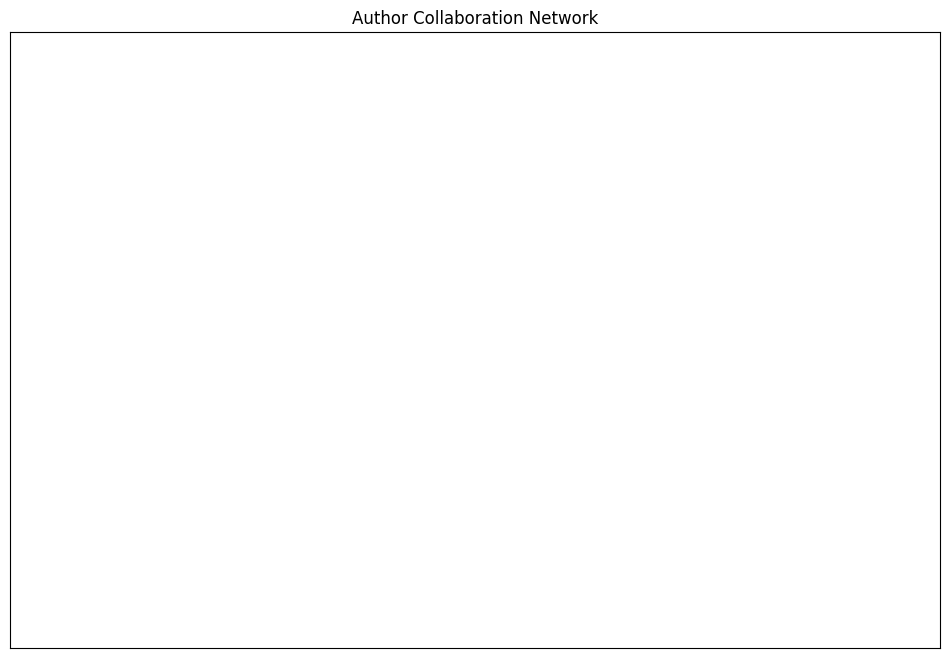

In [40]:
def create_author_pairs(row):
    if row and isinstance(row, list):
        return list(itertools.combinations(row, 2))
    return []

# Apply the function to each row and concatenate the results
author_pairs = df['authors'].apply(create_author_pairs).sum()

# Create a DataFrame from the author pairs
author_pairs_df = pd.DataFrame(author_pairs, columns=['Author1', 'Author2'])

# Creating a graph from the DataFrame
G = nx.from_pandas_edgelist(author_pairs_df, 'Author1', 'Author2')

# Draw the network graph
plt.figure(figsize=(12, 8))
nx.draw_networkx(G, with_labels=True, node_color='skyblue', edge_color='gray', font_size=10)
plt.title("Author Collaboration Network")
plt.show()

In [41]:
df.head()

,id,link_texts,link_hrefs,title,title_detail,links,link,guidislink,authors,author,author_detail,published,published_parsed,summary,summary_detail,content
0,https://www.sltrib.com/news/2024/01/07/widespr...,"[National Weather Service, The Weather Channel]",[https://forecast.weather.gov/product.php?site...,Utah snowstorm brings more than 1 foot in spot...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/news/2024/01/07/widespr...,False,[{'name': 'Kolbie Peterson'}],Kolbie Peterson,{'name': 'Kolbie Peterson'},"Sun, 07 Jan 2024 19:58:22 +0000","[2024, 1, 7, 19, 58, 22, 6, 7, 0]",{'input_documents': [Document(page_content='[{...,"{'type': 'text/html', 'language': None, 'base'...","[{'type': 'text/html', 'language': None, 'base..."
1,https://www.sltrib.com/news/2024/01/07/thieves...,[],[],Thieves steal thousands of dollars of alcohol ...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/news/2024/01/07/thieves...,False,[{'name': 'Kolbie Peterson'}],Kolbie Peterson,{'name': 'Kolbie Peterson'},"Sun, 07 Jan 2024 17:15:05 +0000","[2024, 1, 7, 17, 15, 5, 6, 7, 0]","{'input_documents': [Document(page_content=""[{...","{'type': 'text/html', 'language': None, 'base'...","[{'type': 'text/html', 'language': None, 'base..."
2,https://www.sltrib.com/sports/jazz/2024/01/07/...,"[heralded rookie Keyonte George, George was in...",[https://www.sltrib.com/sports/jazz/2023/10/26...,Utah Jazz saw a promising sign in second half ...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/sports/jazz/2024/01/07/...,False,[{'name': 'Eric Walden'}],Eric Walden,{'name': 'Eric Walden'},"Sun, 07 Jan 2024 20:06:04 +0000","[2024, 1, 7, 20, 6, 4, 6, 7, 0]",{'input_documents': [Document(page_content='[{...,"{'type': 'text/html', 'language': None, 'base'...","[{'type': 'text/html', 'language': None, 'base..."
3,https://www.sltrib.com/artsliving/2024/01/07/s...,"[lied to members, imprisoned FLDS prophet Warr...",[https://www.sltrib.com/news/2022/12/06/how-sa...,Scott D. Pierce: New docuseries delves into th...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/artsliving/2024/01/07/s...,False,[{'name': 'Scott D. Pierce'}],Scott D. Pierce,{'name': 'Scott D. Pierce'},"Sun, 07 Jan 2024 13:34:38 +0000","[2024, 1, 7, 13, 34, 38, 6, 7, 0]",{'input_documents': [Document(page_content='[{...,"{'type': 'text/html', 'language': None, 'base'...","[{'type': 'text/html', 'language': None, 'base..."
4,https://www.sltrib.com/opinion/commentary/2024...,"[ Tasunke Witko, developed a statement, lived...",[https://www.lakotatimes.com/articles/tasunke-...,Opinion: Utah’s faith groups are coming togeth...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/opinion/commentary/2024...,False,[{'name': 'The Great Salt Lake Interfaith Acti...,The Great Salt Lake Interfaith Action Coalitio...,{'name': 'The Great Salt Lake Interfaith Actio...,"Sun, 07 Jan 2024 13:05:00 +0000","[2024, 1, 7, 13, 5, 0, 6, 7, 0]",{'input_documents': [Document(page_content='[{...,"{'type': 'text/html', 'language': None, 'base'...","[{'type': 'text/html', 'language': None, 'base..."


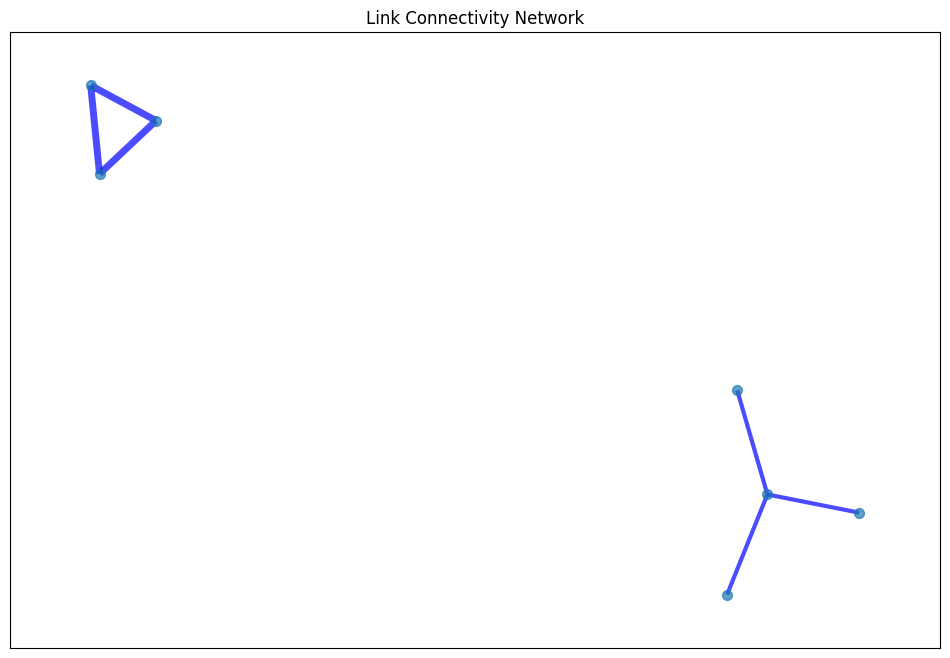

In [43]:
# Assuming df is already loaded with the appropriate data

# Function to create pairs of links
def create_link_pairs(row):
    if row and isinstance(row, list):
        return list(itertools.combinations(row, 2))
    return []

# Apply the function to each row and concatenate the results
link_pairs = df['link_hrefs'].apply(create_link_pairs).sum()

# Create a DataFrame from the link pairs
link_pairs_df = pd.DataFrame(link_pairs, columns=['Link1', 'Link2'])

# Count the frequency of each pair
link_pairs_count = link_pairs_df.groupby(['Link1', 'Link2']).size().reset_index(name='Count')


threshold = 2
# Filter out infrequent pairs for clearer visualization
filtered_link_pairs_count = link_pairs_count[link_pairs_count['Count'] > threshold]  # Set a threshold value

# Creating a graph from the DataFrame
G = nx.from_pandas_edgelist(filtered_link_pairs_count, 'Link1', 'Link2', ['Count'])

# Draw the network graph
plt.figure(figsize=(12, 8))
edges = G.edges(data=True)
weights = [edge[2]['Count'] for edge in edges]
nx.draw_networkx(G, with_labels=False, node_size=50, width=weights, edge_color='blue', alpha=0.7)
plt.title("Link Connectivity Network")
plt.show()

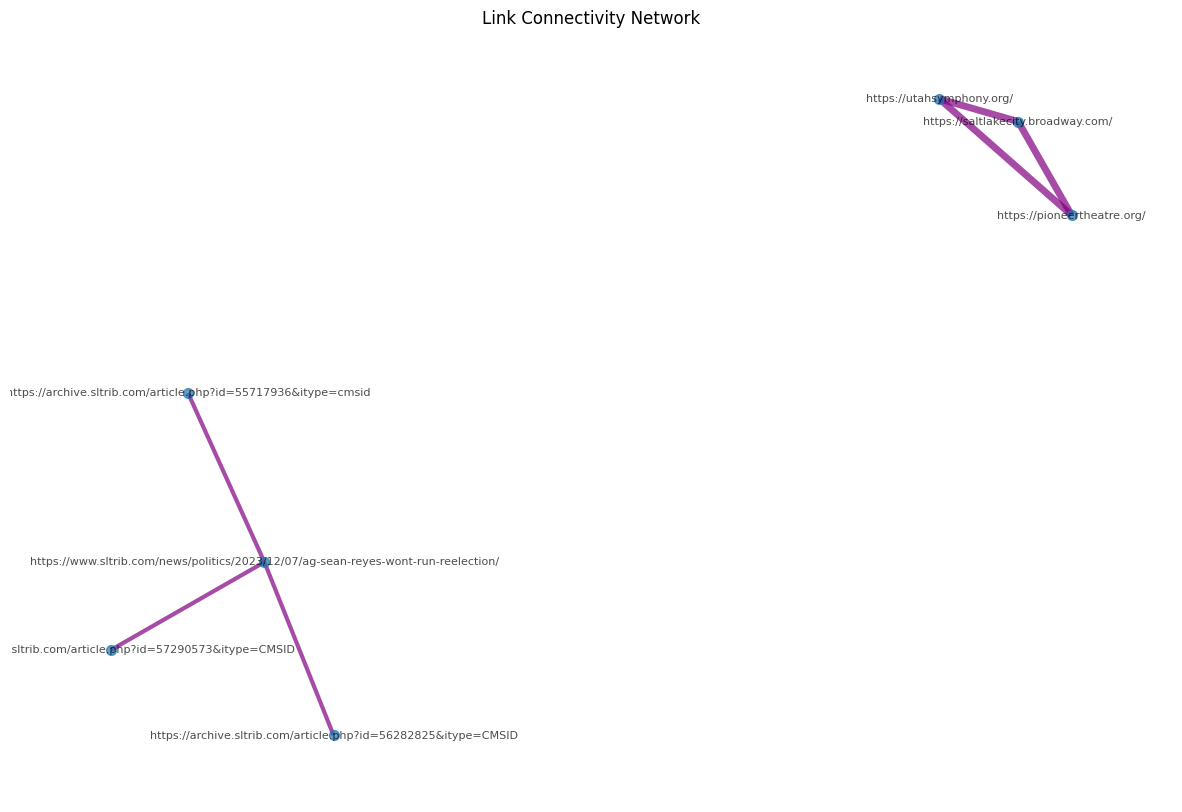

In [45]:
# Filter out infrequent pairs for clearer visualization
threshold = 2  # Set a threshold value for visibility
filtered_link_pairs_count = link_pairs_count[link_pairs_count['Count'] > threshold]

# Creating a graph from the DataFrame
G = nx.from_pandas_edgelist(filtered_link_pairs_count, 'Link1', 'Link2', ['Count'])

# Draw the network graph with labels
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=0.5)  # k adjusts the distance between nodes
edges = G.edges(data=True)
weights = [edge[2]['Count'] for edge in edges]
nx.draw_networkx(G, pos, with_labels=True, node_size=50, width=weights, edge_color='purple', alpha=0.7, font_size=8)
plt.title("Link Connectivity Network")
plt.axis('off')  # Turn off the axis
plt.show()

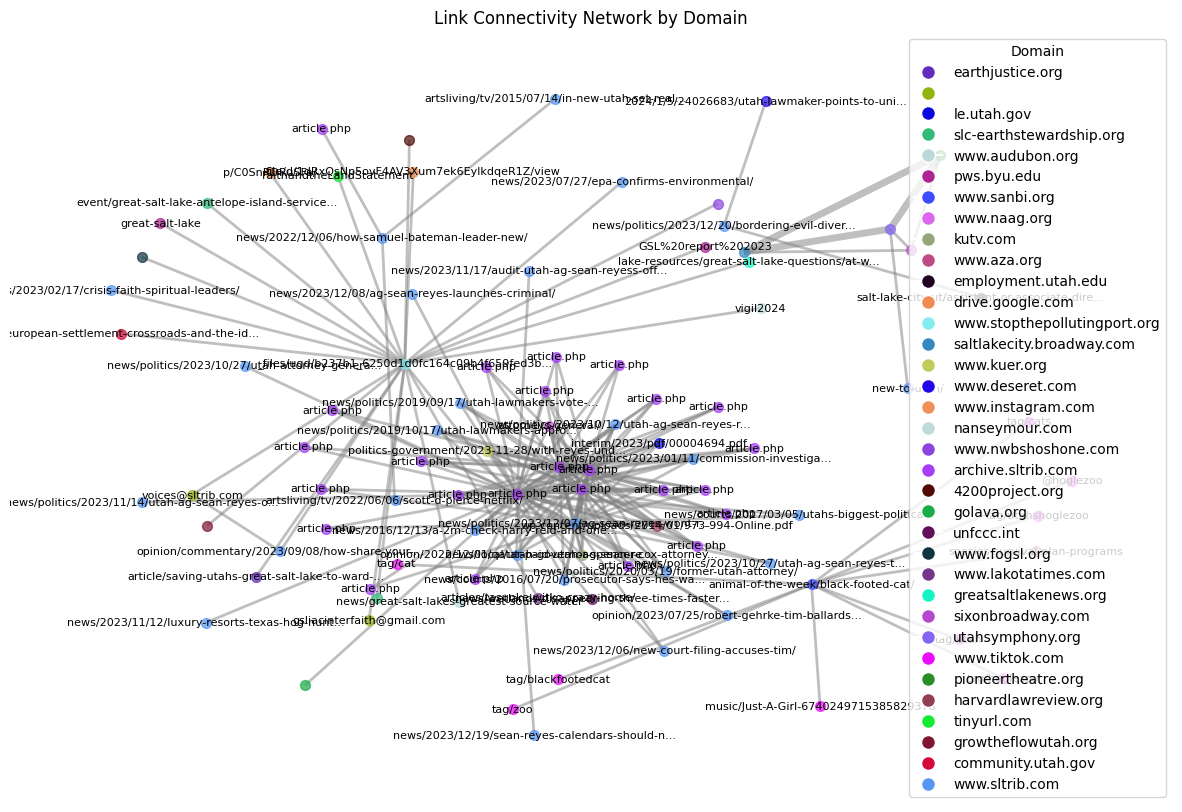

In [51]:
# Assuming df is already loaded with the appropriate data

# Function to create pairs of links
def create_link_pairs(row):
    if row and isinstance(row, list):
        return list(itertools.combinations(row, 2))
    return []

# Function to extract domain from a URL
def get_domain(url):
    try:
        return urlparse(url).netloc
    except:
        return 'Unknown'

# Function to format the path of the URL
def format_domain_label(url):
    path = urlparse(url).path
    # Remove the leading '/' if present
    if path.startswith('/'):
        path = path[1:]
    if len(path) > 48:
        return path[:45] + "..."
    return path
 

# Apply the function to each row and concatenate the results
link_pairs = df['link_hrefs'].apply(create_link_pairs).sum()

# Create a DataFrame from the link pairs
link_pairs_df = pd.DataFrame(link_pairs, columns=['Link1', 'Link2'])

# Extract domains and add them as columns
link_pairs_df['Domain1'] = link_pairs_df['Link1'].apply(get_domain)
link_pairs_df['Domain2'] = link_pairs_df['Link2'].apply(get_domain)

# Count the frequency of each pair
link_pairs_count = link_pairs_df.groupby(['Link1', 'Link2', 'Domain1', 'Domain2']).size().reset_index(name='Count')

# Filter out infrequent pairs for clearer visualization
threshold = 1  # Set a threshold value for visibility
filtered_link_pairs_count = link_pairs_count[link_pairs_count['Count'] > threshold]

# Creating a graph from the DataFrame
G = nx.from_pandas_edgelist(filtered_link_pairs_count, 'Link1', 'Link2', ['Count'])

# Assign a color to each domain
domains = list(set(filtered_link_pairs_count['Domain1']).union(set(filtered_link_pairs_count['Domain2'])))
color_map = {domain: np.random.rand(3,) for domain in domains}

# Draw the network graph with colored nodes
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=0.5)
edges = G.edges(data=True)
weights = [edge[2]['Count'] for edge in edges]

for node in G:
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=[color_map[get_domain(node)]], node_size=50, alpha=0.7)
nx.draw_networkx_edges(G, pos, width=weights, edge_color='gray', alpha=0.5)
# nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')
# Drawing the labels with formatted domain names
formatted_labels = {node: format_domain_label(node) for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=formatted_labels, font_size=8, font_color='black')


# Creating the legend
patch_list = [plt.Line2D([0], [0], marker='o', color='w', label=domain, markersize=10, markerfacecolor=color) for domain, color in color_map.items()]
plt.legend(handles=patch_list, loc='upper right', title='Domain')

plt.title("Link Connectivity Network by Domain")
plt.axis('off')
plt.show()

# plot saving

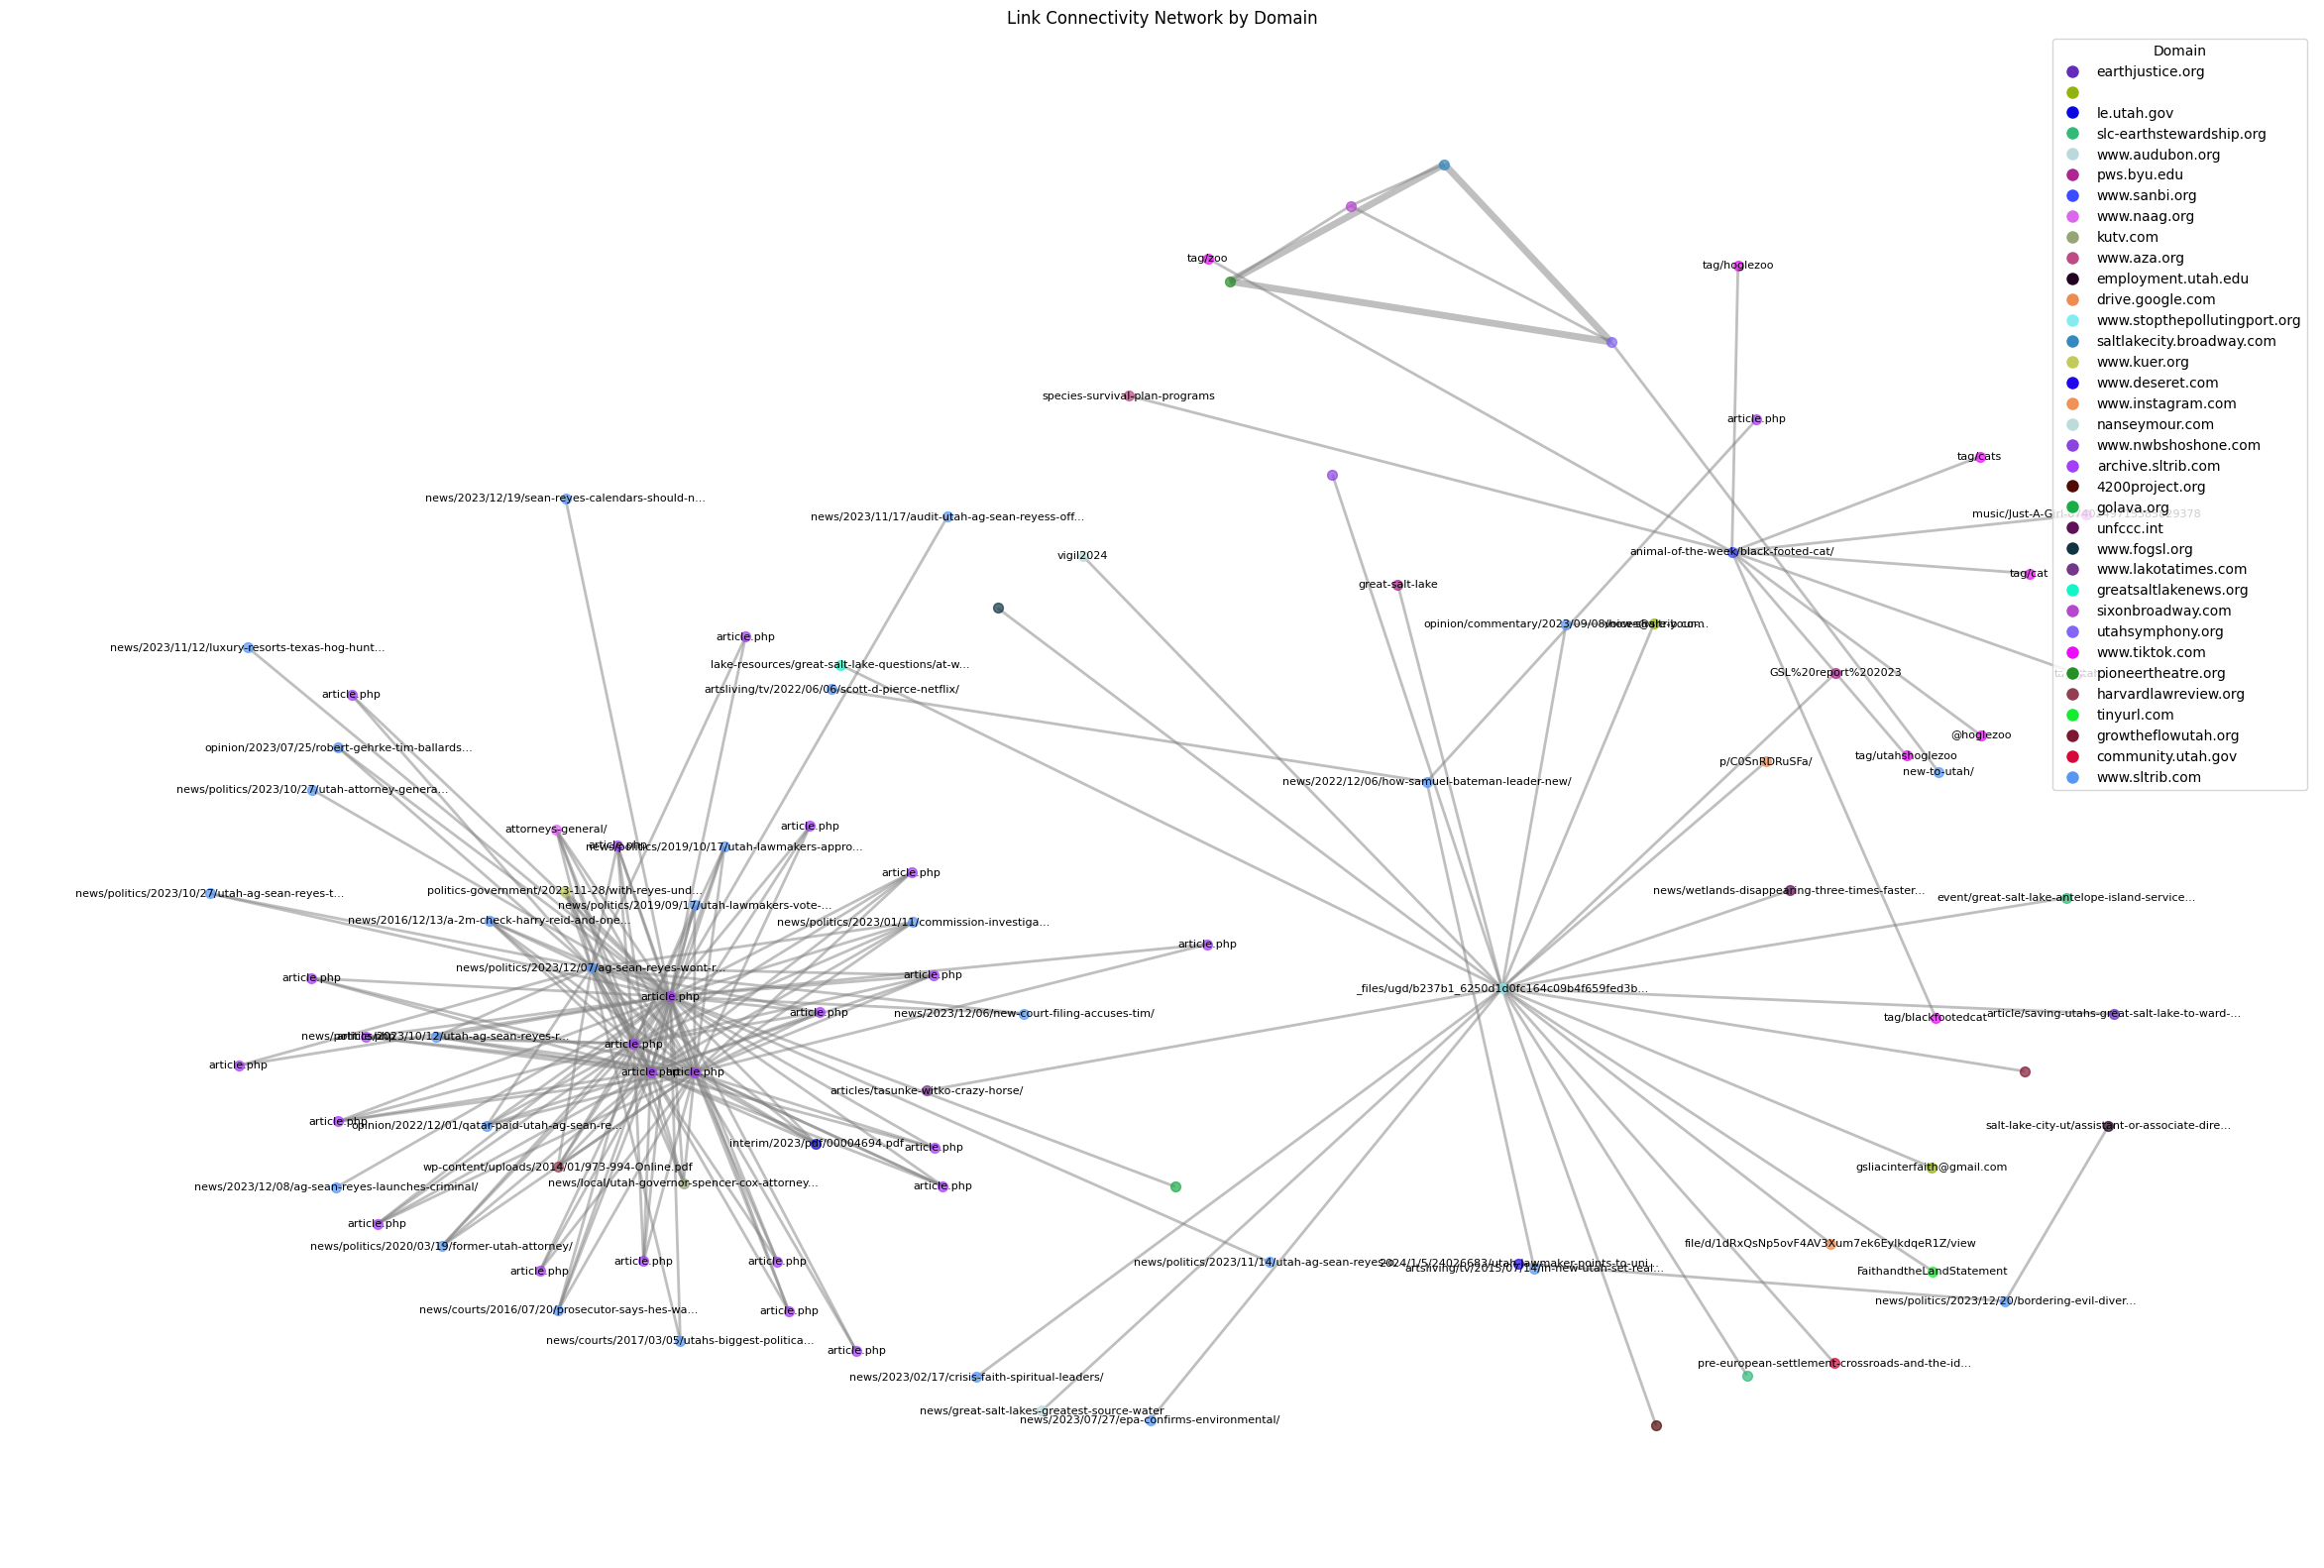

In [52]:
plt.figure(figsize=(30, 20))  # You can adjust the size as needed


pos = nx.spring_layout(G, k=0.5)
edges = G.edges(data=True)
weights = [edge[2]['Count'] for edge in edges]

for node in G:
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=[color_map[get_domain(node)]], node_size=50, alpha=0.7)
nx.draw_networkx_edges(G, pos, width=weights, edge_color='gray', alpha=0.5)
# nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')
# Drawing the labels with formatted domain names
formatted_labels = {node: format_domain_label(node) for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=formatted_labels, font_size=8, font_color='black')


# Creating the legend
patch_list = [plt.Line2D([0], [0], marker='o', color='w', label=domain, markersize=10, markerfacecolor=color) for domain, color in color_map.items()]
plt.legend(handles=patch_list, loc='upper right', title='Domain')


plt.title("Link Connectivity Network by Domain")
plt.axis('off')

# Save the figure as a PNG file
plt.savefig('network_graph.png', format='png', dpi=300, bbox_inches='tight')

plt.show()
